<a href="https://colab.research.google.com/github/TorxToise/Deep-learning-project-/blob/main/Image_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Classification with CNN

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


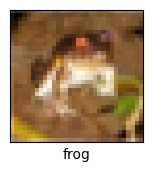

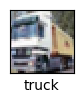

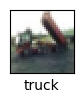

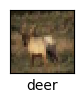

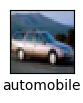

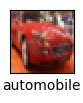

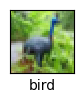

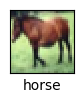

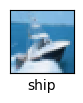

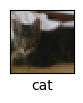

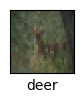

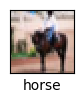

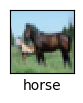

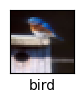

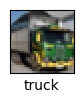

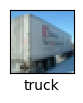

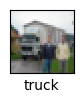

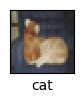

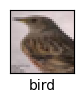

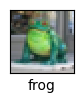

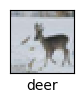

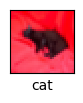

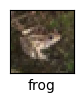

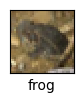

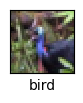

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [2]:
# Step 1: Importing the necessary libraries.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
# Step 2: Loading and pre-processing of the CIFAR-10 dataset.
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Step 3: Normalising pixel values to be between 0 and 1.
train_images = train_images/255.0
test_images = test_images/255.0
# Step 4: Defining the class names for CIFAR-10 images.
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Step 5: Visulaising a few training images from the CIFAR-10 dataset.
plt.figure(figsize=(10,10))
for i in range(25):
    # The following lines need to be indented to be part of the for loop
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_name[train_labels[i][0]])
    plt.show()
# Step 6: Building the CNN model (customised model).
model = models.Sequential([
layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64, (3,3), activation='relu'),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10)
])
# Step 7: Printing the model summary.
model.summary()
# Step 8: Compiling the CNN model.
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy']
)

In [4]:
# Step 9: Training the CNN model.
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
# Step 10: Evaluating the performance of the CNN model.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\n Test accuracy is: {test_acc}')


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 45ms/step - accuracy: 0.3701 - loss: 1.7150 - val_accuracy: 0.5599 - val_loss: 1.2410
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.5808 - loss: 1.1795 - val_accuracy: 0.6139 - val_loss: 1.0904
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.6442 - loss: 1.0126 - val_accuracy: 0.6615 - val_loss: 0.9748
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.6827 - loss: 0.9041 - val_accuracy: 0.6805 - val_loss: 0.9229
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7081 - loss: 0.8424 - val_accuracy: 0.6853 - val_loss: 0.9107
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7289 - loss: 0.7821 - val_accuracy: 0.6970 - val_loss: 0.8740
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 47ms/step - accuracy: 0.7417 - loss: 0.7298 - val_accuracy: 0.7037 - val_loss: 0.8642
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 44ms/step - accuracy: 0.7573 -

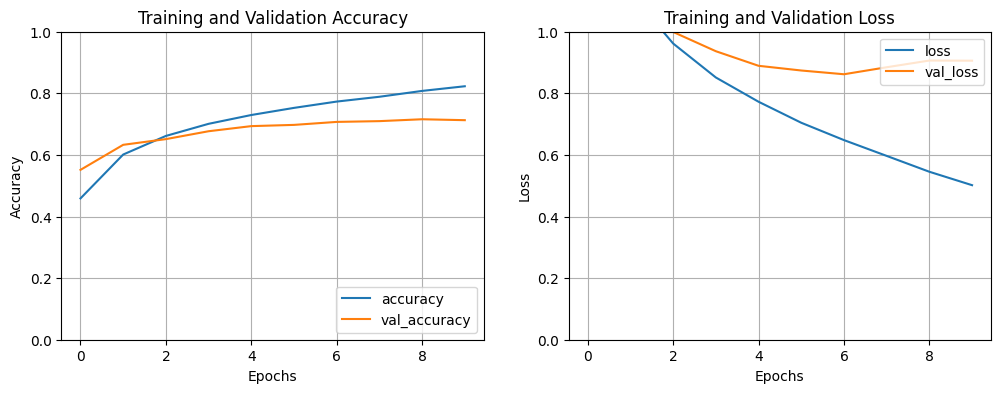

In [8]:
# Step 11: Plotting the training and validation accuracy and loss values.
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()


Hypertuning

In [3]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


Trial 10 Complete [00h 19m 16s]
val_accuracy: 0.6869000196456909

Best val_accuracy So Far: 0.6958000063896179
Total elapsed time: 02h 30m 12s
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 92ms/step - accuracy: 0.3658 - loss: 1.7045 - val_accuracy: 0.5515 - val_loss: 1.2410
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 93ms/step - accuracy: 0.5870 - loss: 1.1689 - val_accuracy: 0.6328 - val_loss: 1.0444
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 196s 89ms/step - accuracy: 0.6548 - loss: 0.9696 - val_accuracy: 0.6513 - val_loss: 0.9992
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 150s 94ms/step - accuracy: 0.6988 - loss: 0.8535 - val_accuracy: 0.6769 - val_loss: 0.9367
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 199s 93ms/step - accuracy: 0.7282 - loss: 0.7726 - val_accuracy: 0.6935 - val_loss: 0.8894
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 92ms/step - accuracy: 0.7552 - loss: 0.7000 - val_accuracy: 0.6975 - val_loss: 0.8741
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 199s 90ms/step - 

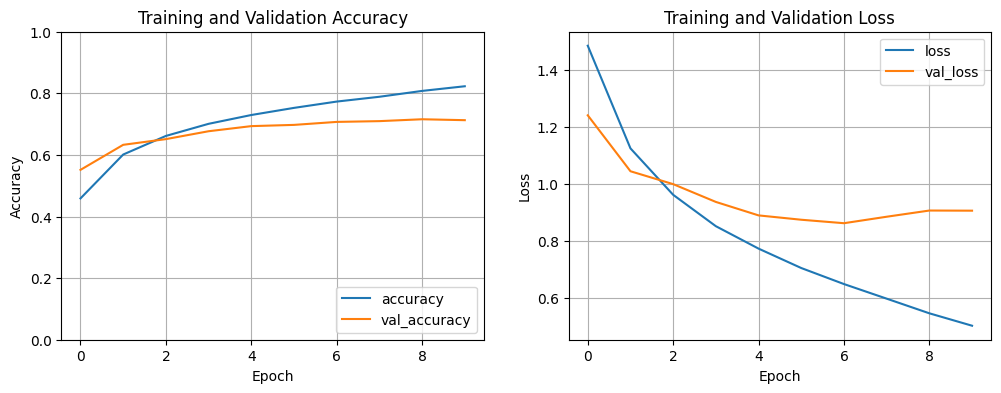

In [7]:
# Step 1: Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras_tuner.tuners import RandomSearch
import matplotlib.pyplot as plt
# Step 2: Loading and preprocessing the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
# Step 3: Defining the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Step 4: Define a function to build the model.
def build_model(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(hp.Int('conv1_units', min_value=32, max_value=128, step=16), (3,3), activation='relu', input_shape=(32,32,3)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(hp.Int('conv2_units', min_value=32, max_value=128, step=16), (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(hp.Int('conv3_units', min_value=32, max_value=128, step=16), (3,3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(hp.Int('dense_units', min_value=32, max_value=128, step=16), activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(10))
    # Choose an optimizer and learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
    model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    return model
# Step 5: Define the Tuner
tuner = RandomSearch(
build_model,
objective='val_accuracy',
max_trials=10,
executions_per_trial=1,
directory='my_dir',
project_name='cifar10_tunning'
)
# Step 6: Perform the Hyperparameter search
tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
# Step 7: Get the best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# Step 8: Build the model with the best Hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
# Step 9: Plotting training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()

Advanced Hypertuning

Reloading Tuner from my_dir/cifar10_tunning/tuner0.json


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.3803 - loss: 1.7187 - val_accuracy: 0.5344 - val_loss: 1.3046
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.5539 - loss: 1.2669 - val_accuracy: 0.5773 - val_loss: 1.2095
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.5996 - loss: 1.1431 - val_accuracy: 0.5981 - val_loss: 1.1562
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6284 - loss: 1.0688 - val_accuracy: 0.6049 - val_loss: 1.1182
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.6525 - loss: 1.0079 - val_accuracy: 0.6181 - val_loss: 1.0999
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6657 - loss: 0.9572 - val_accuracy: 0.6201 - val_loss: 1.1041
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.6872 - loss: 0.9086 - val_accuracy: 0.6291 - val_loss: 1.0752
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6903 -

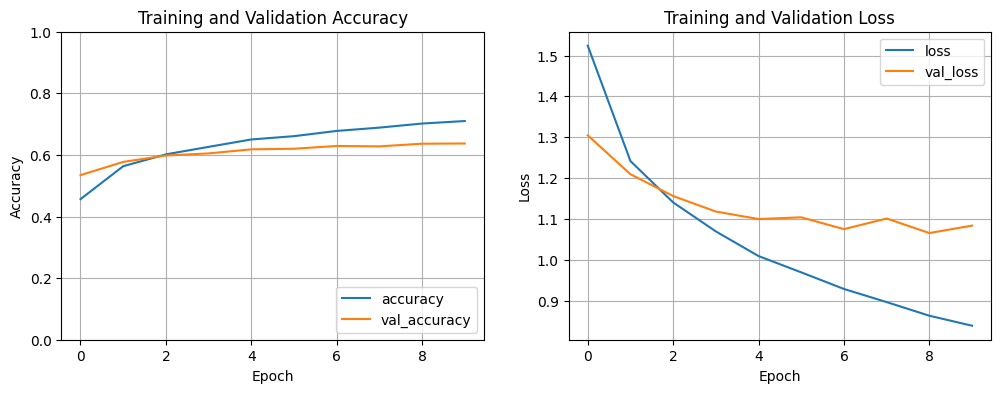

In [10]:
# Step 1: Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras_tuner.tuners import RandomSearch
import matplotlib.pyplot as plt
# Step 2: Loading and preprocessing the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
# Step 3: Defining the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Step 4: Define a function to build the model.
def build_model(hp):
    model = models.Sequential()
    # Tune the number of Convolutional Layers (1, 2 or 3)
    for i in range(hp.Int('conv_layers', 1, 3)):
        if i == 0:
            model.add(layers.Conv2D(
                filters = hp.Int('filters_' + str(i), min_value=32, max_value=128, step=16),
                kernel_size = (3, 3),
                activation = 'relu',
                input_shape = (32, 32, 3)
            ))
        else:
            model.add(layers.Conv2D(
                filters = hp.Int('filters_' + str(i), min_value=32, max_value=128, step=16),
                kernel_size = (3, 3),
                activation = 'relu',
                padding = 'same'))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    # Tune the number of Dense Layers (1,2 or 3)
    for i in range(hp.Int('dense_layers', 1, 3)):
        model.add(layers.Dense(
            units = hp.Int('units_' + str(i), min_value=32, max_value=128, step=16),
            activation = 'relu'))
        # Tune the dropout rate
        model.add(layers.Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.5, step=0.1)))
    # The last dense layer with 10 output units (for 10 classes of CIFAR-10 dataset)
    model.add(layers.Dense(10))
    # Choose an optimizer and learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
    model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    return model
# Step 5: Define the Tuner
tuner = RandomSearch(
build_model,
objective='val_accuracy',
max_trials=10,
executions_per_trial=1,
directory='my_dir',
project_name='cifar10_tunning'
)
# Step 6: Perform the Hyperparameter search
tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
# Step 7: Get the best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# Step 8: Build the model with the best Hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
# Step 9: Plotting training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()